<a href="https://colab.research.google.com/github/Rohsha/Datascience/blob/master/Microsoft%20malware%20dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ['KAGGLE_USERNAME'] = "rohinisubramaniam" # username from the json file

os.environ['KAGGLE_KEY'] = "22aa1922fcaa2f5e066336187cf441b4" # key from the json file

!kaggle competitions download -c microsoft-malware-prediction


 99% 662M/672M [00:08<00:00, 56.6MB/s]
100% 672M/672M [00:08<00:00, 80.2MB/s]
 97% 745M/768M [00:12<00:00, 97.8MB/s]
100% 768M/768M [00:12<00:00, 66.5MB/s]
 84% 113M/134M [00:03<00:00, 29.0MB/s]
100% 134M/134M [00:03<00:00, 35.9MB/s]


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
!unzip \*.zip


Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

3 archives were successfully processed.


In [6]:
import pandas as pd
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
train.head()
print(len(train))
print(len(test))

8921483
7853253


In [8]:
train.isna().sum()
train.columns[train.isnull().any()].tolist()  # to get a list instead of an Index object


['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IsProtected',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightingInternal

In [0]:
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


In [0]:
for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(train[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = train[i].fillna(np.mean(train[i]))


In [0]:
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')


In [0]:
for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')


In [0]:
train['sour'] = 0
test['sour'] = 1
training = train.drop('HasDetections',axis=1) #droping target variable


In [0]:
train_rand = training.sample(7000, random_state=12)
test_rand = test.sample(6000, random_state=11)



In [0]:
concat = train_rand.append(test_rand)
y = concat['sour']
concat.drop('sour',axis=1,inplace=True)


In [17]:
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in concat.columns:
    score = cross_val_score(model,pd.DataFrame(concat[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))


EngineVersion 0.8714176904761904
AppVersion 0.9929319761904762
AvSigVersion 0.9526830476190475
OsBuildLab 0.9790886428571428
Census_ChassisTypeName 0.9986150476190476
Census_InternalBatteryType 0.9997590952380953
Census_OSVersion 0.8318750714285714
Census_OSBranch 0.9054165714285713
Census_OSEdition 0.9943423333333333
Census_OSSkuName 0.8076904523809524
Census_FlightRing 0.9832465714285714


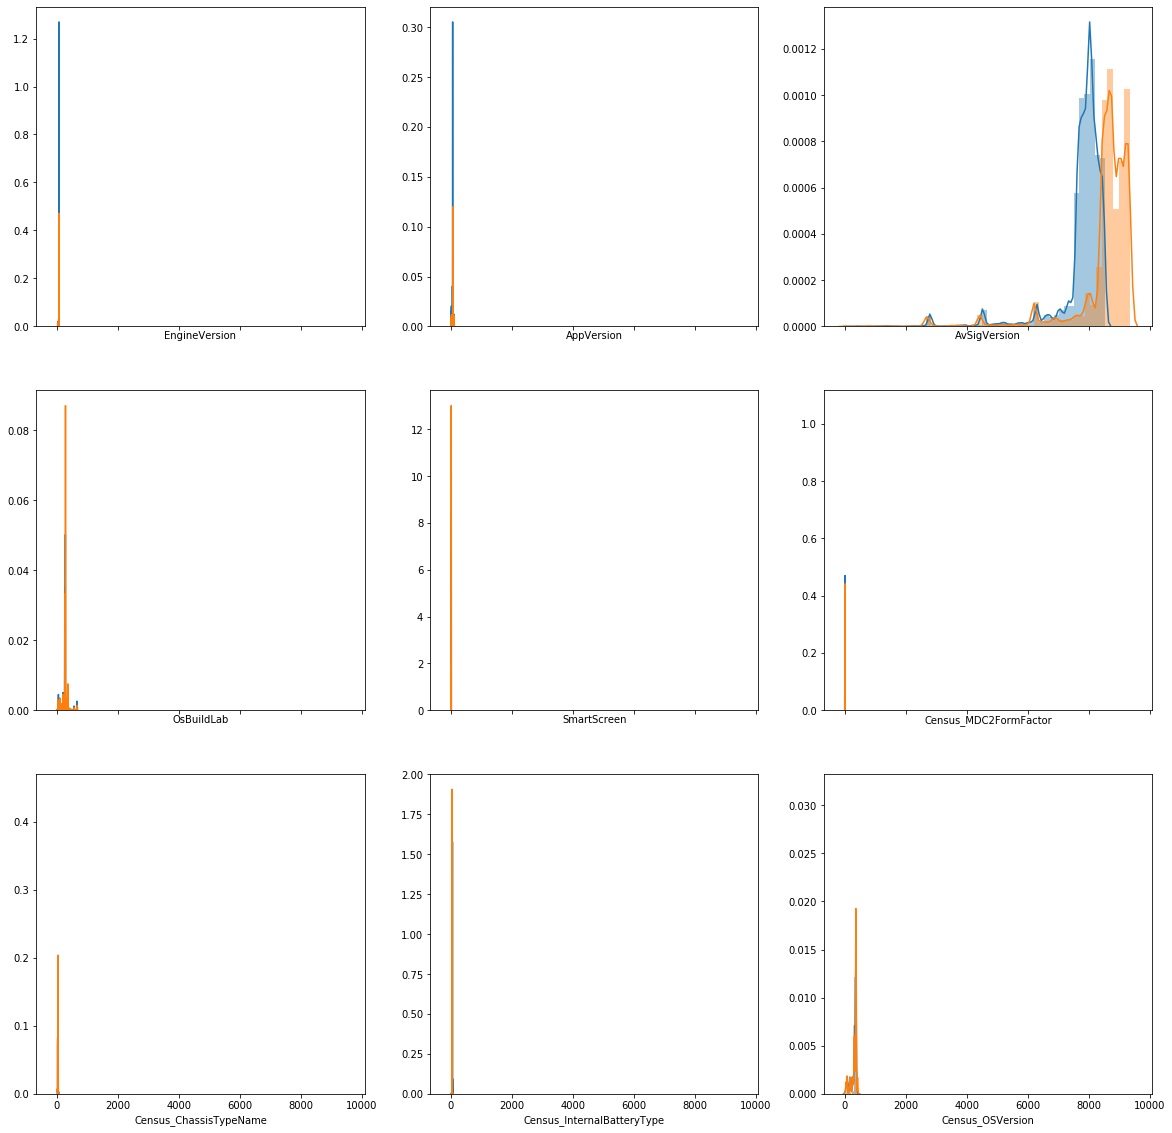

In [18]:
import seaborn as sns
f, axes = plt.subplots(3,3, figsize=(20, 20), sharex=True)
sns.distplot(train_rand['EngineVersion'],ax=axes[0, 0])
sns.distplot(test_rand['EngineVersion'],ax=axes[0, 0])
sns.distplot(train_rand['AppVersion'],ax=axes[0, 1])
sns.distplot(test_rand['AppVersion'],ax=axes[0, 1])
sns.distplot(train_rand['AvSigVersion'],ax=axes[0,2])
sns.distplot(test_rand['AvSigVersion'],ax=axes[0,2])
sns.distplot(train_rand['OsBuildLab'],ax=axes[1,0])
sns.distplot(test_rand['OsBuildLab'],ax=axes[1,0])
sns.distplot(train_rand['SmartScreen'],ax=axes[1,1])
sns.distplot(test_rand['SmartScreen'],ax=axes[1,1])
sns.distplot(train_rand['Census_MDC2FormFactor'],ax=axes[1,2])
sns.distplot(test_rand['Census_MDC2FormFactor'],ax=axes[1,2])
sns.distplot(train_rand['Census_ChassisTypeName'],ax=axes[2,0])
sns.distplot(test_rand['Census_ChassisTypeName'],ax=axes[2,0])
sns.distplot(train_rand['Census_InternalBatteryType'],ax=axes[2,1])
sns.distplot(test_rand['Census_InternalBatteryType'],ax=axes[2,1])
sns.distplot(train_rand['Census_OSVersion'],ax=axes[2,2])
sns.distplot(test_rand['Census_OSVersion'],ax=axes[2,2])


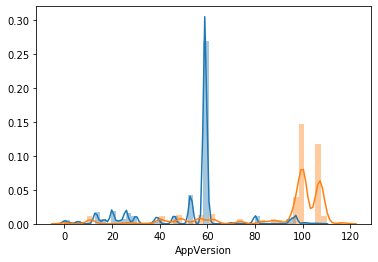

In [0]:
sns.distplot(train_rand['AppVersion'])
sns.distplot(test_rand['AppVersion'])


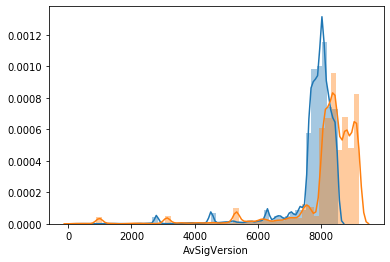

In [0]:
sns.distplot(train_rand['AvSigVersion'])
sns.distplot(test_rand['AvSigVersion'])


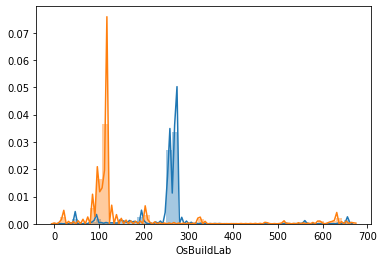

In [0]:
sns.distplot(train_rand['OsBuildLab'])
sns.distplot(test_rand['OsBuildLab'])

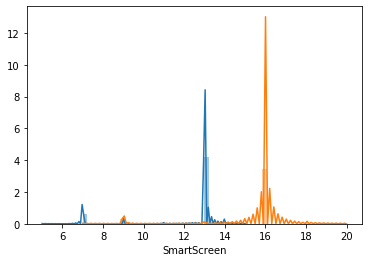

In [0]:
sns.distplot(train_rand['SmartScreen'])
sns.distplot(test_rand['SmartScreen'])

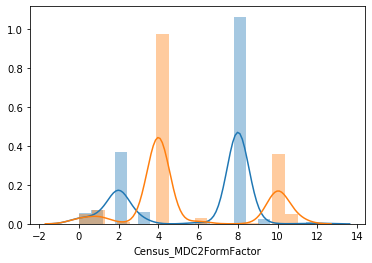

In [0]:
sns.distplot(train_rand['Census_MDC2FormFactor'])
sns.distplot(test_rand['Census_MDC2FormFactor'])


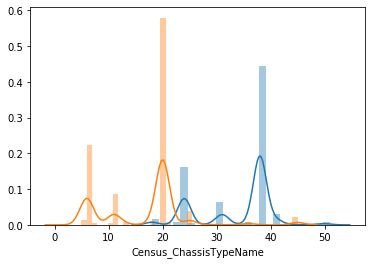

In [0]:
sns.distplot(train_rand['Census_ChassisTypeName'])
sns.distplot(test_rand['Census_ChassisTypeName'])


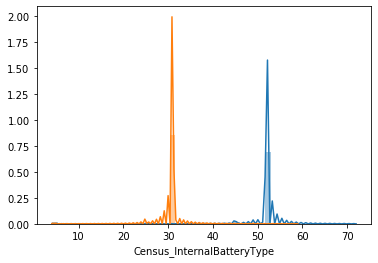

In [0]:
sns.distplot(train_rand['Census_InternalBatteryType'])
sns.distplot(test_rand['Census_InternalBatteryType'])


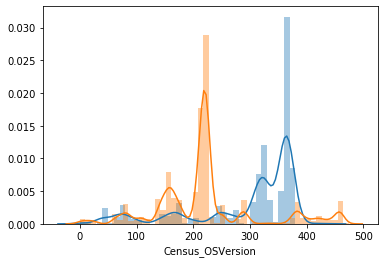

In [0]:
sns.distplot(train_rand['Census_OSVersion'])
sns.distplot(test_rand['Census_OSVersion'])


In [0]:
def boostrap_mean(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
  data_mean=np.mean(data_mean11)  
  print (data_mean)
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  return data_mean,lower,upper

50.73
50.597454545454546
50.81819047619047
50.76361290322581
50.80468292682927
50.920352941176475
50.84740983606557
50.845098591549295
50.80167901234567
50.81534065934066
50.795742574257424
50.78464864864865
50.81722314049586
50.781893129770985
50.81407092198581
50.794423841059604
50.784310559006215
50.79997660818713
50.82383425414364
50.84160209424084
50.80820895522388
50.798862559241705
50.777764705882355
50.77563636363636
50.82609958506224
50.80655776892431
50.784444444444446
50.79041328413284
50.80423487544484
50.83221305841924
50.80251162790698
50.840514469453375
50.795919003115266
50.79734743202417
50.81
50.81296866096866
50.804759002770076
50.82030727762803
50.831081364829394
50.82484910485934
50.826658354114706
50.81597566909976
50.82278384798099
50.833573085846865
50.809764172335605
50.82254988913525
50.80893275488069
50.80072186836518
50.80449480249481
50.80867209775967
50.79302594810378
50.79945988258317
50.80480998080614
50.814290018832395
50.79442883548983
50.7878584392014

(0, 100000)

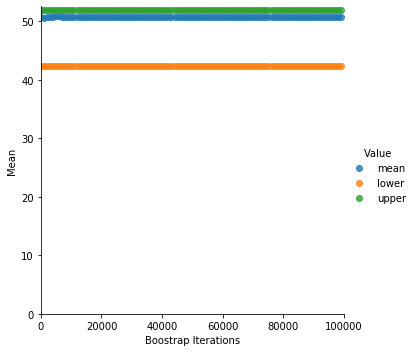

In [20]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(train['Census_InternalBatteryType'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [0]:
def boostrap_mean(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
  data_mean=np.mean(data_mean11)  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  return data_mean,lower,upper

30.082000000000004
30.20054545454546
30.285809523809522
30.239032258064515
30.23848780487805
30.31529411764706
30.255737704918033
30.250816901408452
30.274864197530867
30.254153846153844
30.26095049504951
30.244270270270274
30.263752066115703
30.25774045801527
30.27402836879433
30.2495761589404
30.2640248447205
30.244748538011695
30.297325966850828
30.2568167539267
30.261293532338307
30.26506161137441
30.26542081447964
30.25425108225108
30.284506224066394
30.259824701195218
30.25739463601533
30.279697416974166
30.255423487544483
30.284481099656357
30.245421926910296
30.26048231511254
30.256429906542056
30.267069486404832
30.272733137829913
30.245994301994305
30.2636620498615
30.254172506738545
30.270141732283466
30.27133503836317
30.24650374064838
30.24924087591241
30.259220902612824
30.27097447795824
30.26531065759637
30.242035476718403
30.257605206073755
30.264373673036093
30.249247401247406
30.27482281059064
30.263261477045912
30.26701369863014
30.269673704414593
30.258817325800376


(0, 100000)

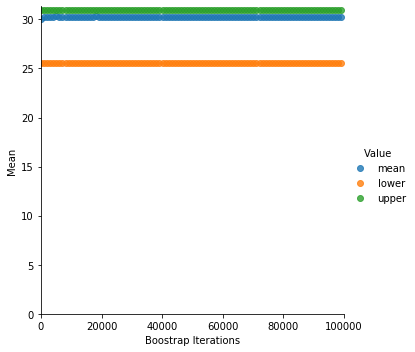

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(test['Census_InternalBatteryType'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [0]:
def boostrap_mean1(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
 
  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  data_mean1=data_mean11[(data_mean11>lower) & (data_mean11<upper)]  
  data_mean=np.mean(data_mean1) 
  print(data_mean)
 
  return data_mean

In [0]:
mean1=boostrap_mean1(train['Census_InternalBatteryType'], 10000 )

46.44329132690881


In [0]:
mean2=boostrap_mean1(test['Census_InternalBatteryType'],10000 )


35.699653979238754


In [0]:
T_obs=mean1-mean2
print(T_obs)


10.74363734767006


In [0]:
data1=train['Census_InternalBatteryType']
data2=test['Census_InternalBatteryType']
new_data=np.concatenate([data1,data2])
count=0
for i in range(20000):
  dat1=np.random.choice(new_data,7000)
  dat2=np.random.choice(new_data,6000)
  mean_dat1=np.mean(dat1)
  mean_dat2=np.mean(dat2)
  T_perm= mean_dat2-mean_dat1
  if T_perm>T_obs:
    count=count+1
p_value=count/20000
print(p_value)


0.0


In [0]:
#since the p value is less than .05 we  reject the null hypotheses hence  mean of training is not equal to mean of testing

data_dictionary.txt: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
macro.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


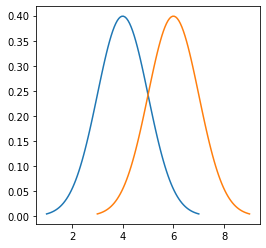

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 4
variance = 1
mu1=6
variance2=1

sigma = math.sqrt(variance)
sigma1=math.sqrt(variance2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 100)
plt.figure(figsize=(4,4))

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(y, stats.norm.pdf(y, mu1, sigma))

plt.show()
